In [3]:
# Load Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
crime=pd.read_csv("D:\CSV FIles Path\Assignments\Clustering\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# Renaming a blank Column Head
crime.rename(columns={"Unnamed: 0":'States'}, inplace=True)
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
# Check the datatype of each variable
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
# Conveterting datatype Object to Category 
crime['States']=crime['States'].astype("category")
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   States    50 non-null     category
 1   Murder    50 non-null     float64 
 2   Assault   50 non-null     int64   
 3   UrbanPop  50 non-null     int64   
 4   Rape      50 non-null     float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 4.2 KB


In [8]:
# check the no. of rows and Column
crime.shape

(50, 5)

In [9]:
#Check Duplicate Row if any
crime[crime.duplicated()].shape

(0, 5)

In [10]:
# Normalization function for Scaling
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_norm = minmax_func(crime.iloc[:,1:])

In [12]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


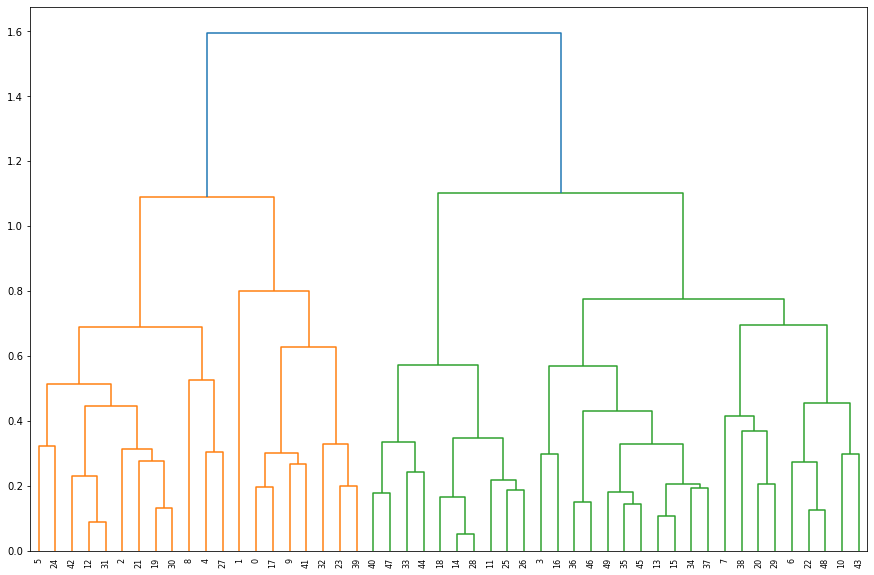

In [13]:
# Create Dendrogram using various Linkage Method.
plt.figure(figsize=(15, 10)) 
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

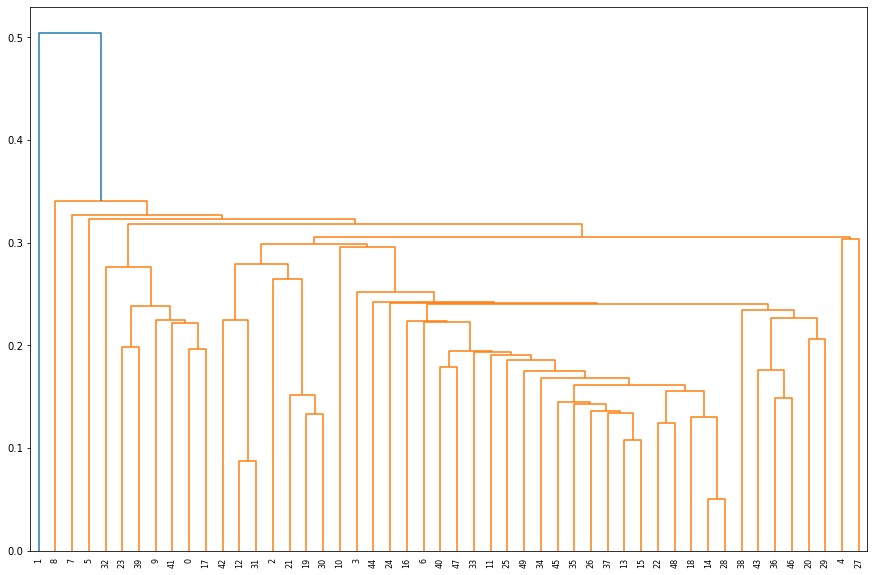

In [14]:
# Create Dendrogram using SINGLE Linkage Method.
plt.figure(figsize=(15, 10)) 
DENDO = sch.dendrogram(sch.linkage(df_norm, method='single'))

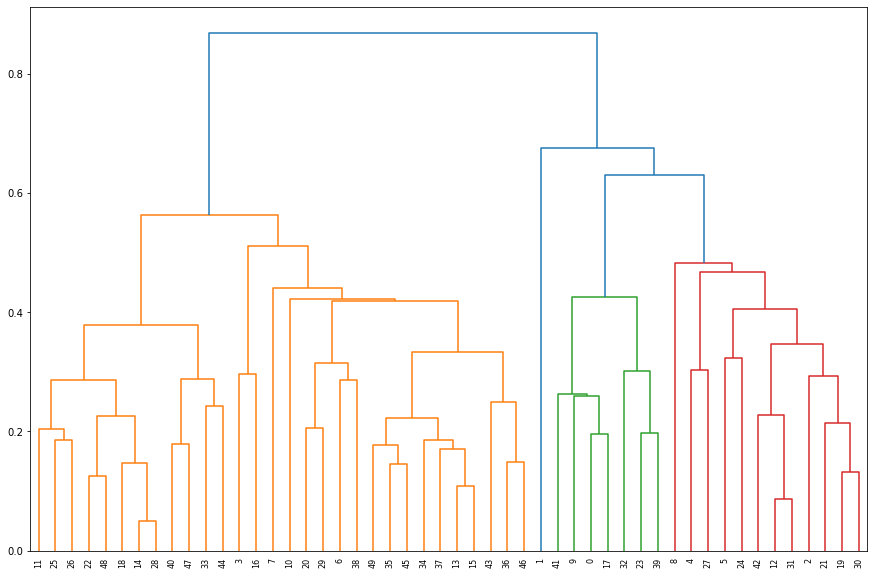

In [15]:
# Create Dendrogram using Average Linkage Method.
plt.figure(figsize=(15, 10)) 
DENDO1 = sch.dendrogram(sch.linkage(df_norm, method='average'))

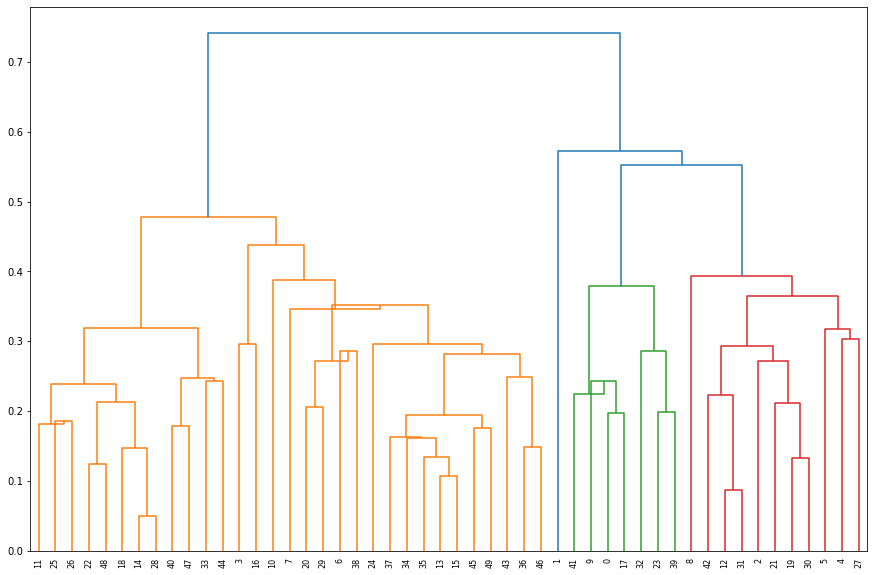

In [16]:
# Create Dendrogram using Centroid Linkage Method.
plt.figure(figsize=(15, 10)) 
DENDO2 = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

### Create HIERARCHICAL CLUSTERING based on "COMPLETE LINKAGE METHOD" 

In [17]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

### Save Clusters for Analysis and Chart

In [18]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Cluster ID'])

In [19]:
# Check no. of records under each Cluster ID
Clusters.value_counts()

Cluster ID
0             20
1             20
2             10
dtype: int64

### Add Clusters to our Scaled Dataset

In [20]:
df_norm['Cluster ID'] = y_hc
df_norm.head()

,Murder,Assault,UrbanPop,Rape,Cluster ID
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


### Add Clusters to our Original Dataset

In [21]:
crime['Cluster ID'] = y_hc
crime.head()

,States,Murder,Assault,UrbanPop,Rape,Cluster ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [22]:
# shift column 'Cluster ID' to first position
first_column = crime.pop('Cluster ID')

In [23]:
# insert column using insert(position,column_name,first_column) function
crime.insert(0, 'Cluster ID', first_column)

In [24]:
Clusters.value_counts()

Cluster ID
0             20
1             20
2             10
dtype: int64

In [25]:
crime.groupby('Cluster ID').agg(['mean']).T

,Cluster ID,0,1,2
Murder,mean,12.165,5.715,3.18
Assault,mean,255.250,132.300,78.70
UrbanPop,mean,68.400,70.800,49.30
Rape,mean,29.165,18.100,11.63


In [26]:
# Adding a Total_crime col to see the relationship with the cluster
crime["Total_Crime"] = crime.Murder + crime.Assault + crime.Rape
crime

,Cluster ID,States,Murder,Assault,UrbanPop,Rape,Total_Crime
0,0,Alabama,13.2,236,58,21.2,270.4
1,0,Alaska,10.0,263,48,44.5,317.5
2,0,Arizona,8.1,294,80,31.0,333.1
3,1,Arkansas,8.8,190,50,19.5,218.3
4,0,California,9.0,276,91,40.6,325.6
5,0,Colorado,7.9,204,78,38.7,250.6
6,1,Connecticut,3.3,110,77,11.1,124.4
7,1,Delaware,5.9,238,72,15.8,259.7
8,0,Florida,15.4,335,80,31.9,382.3
9,0,Georgia,17.4,211,60,25.8,254.2


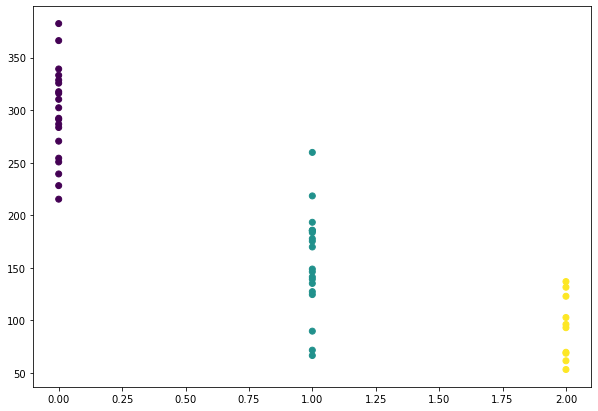

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['Cluster ID'], crime['Total_Crime'],c=hc.labels_)

In [28]:
# Checking total Crime for Cluster 0 in desending Order
crime[crime['Cluster ID']==0].sort_values("Total_Crime",ascending=False)

,Cluster ID,States,Murder,Assault,UrbanPop,Rape,Total_Crime
8,0,Florida,15.4,335,80,31.9,382.3
32,0,North Carolina,13.0,337,45,16.1,366.1
19,0,Maryland,11.3,300,67,27.8,339.1
2,0,Arizona,8.1,294,80,31.0,333.1
30,0,New Mexico,11.4,285,70,32.1,328.5
4,0,California,9.0,276,91,40.6,325.6
1,0,Alaska,10.0,263,48,44.5,317.5
39,0,South Carolina,14.4,279,48,22.5,315.9
27,0,Nevada,12.2,252,81,46.0,310.2
21,0,Michigan,12.1,255,74,35.1,302.2


In [29]:
# Checking total Crime for Cluster 1 in desending Order
crime[crime['Cluster ID']==1].sort_values("Total_Crime",ascending=False)

,Cluster ID,States,Murder,Assault,UrbanPop,Rape,Total_Crime
7,1,Delaware,5.9,238,72,15.8,259.7
3,1,Arkansas,8.8,190,50,19.5,218.3
36,1,Oregon,4.9,159,67,29.3,193.2
38,1,Rhode Island,3.4,174,87,8.3,185.7
29,1,New Jersey,7.4,159,89,18.8,185.2
45,1,Virginia,8.5,156,63,20.7,185.2
49,1,Wyoming,6.8,161,60,15.6,183.4
35,1,Oklahoma,6.6,151,68,20.0,177.6
46,1,Washington,4.0,145,73,26.2,175.2
20,1,Massachusetts,4.4,149,85,16.3,169.7


In [30]:
# Checking total Crime for Cluster 2 in desending Order
crime[crime['Cluster ID']==2].sort_values("Total_Crime",ascending=False)

,Cluster ID,States,Murder,Assault,UrbanPop,Rape,Total_Crime
11,2,Idaho,2.6,120,54,14.2,136.8
25,2,Montana,6.0,109,53,16.4,131.4
26,2,Nebraska,4.3,102,62,16.5,122.8
40,2,South Dakota,3.8,86,45,12.8,102.6
47,2,West Virginia,5.7,81,39,9.3,96.0
18,2,Maine,2.1,83,51,7.8,92.9
14,2,Iowa,2.2,56,57,11.3,69.5
28,2,New Hampshire,2.1,57,56,9.5,68.6
44,2,Vermont,2.2,48,32,11.2,61.4
33,2,North Dakota,0.8,45,44,7.3,53.1


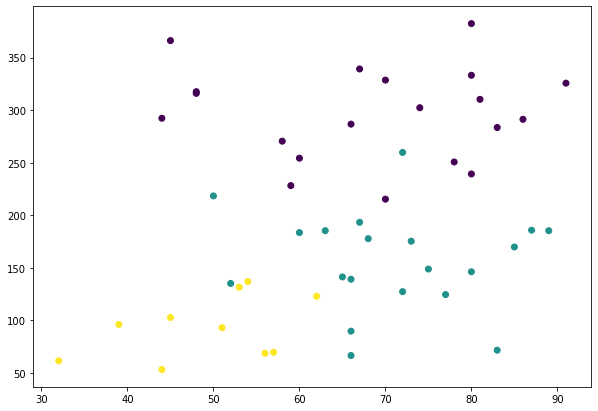

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['UrbanPop'], crime['Total_Crime'],c=hc.labels_)

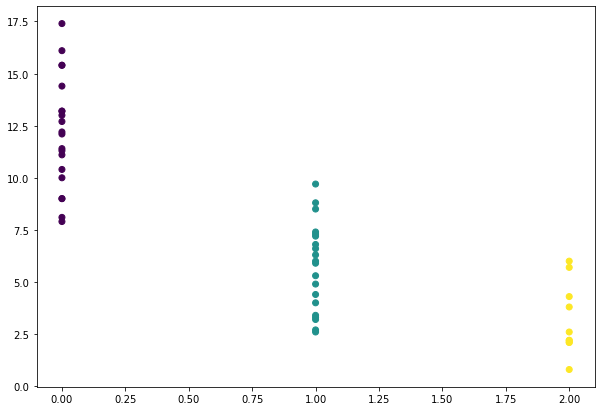

In [32]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['Cluster ID'], crime['Murder'],c=hc.labels_)

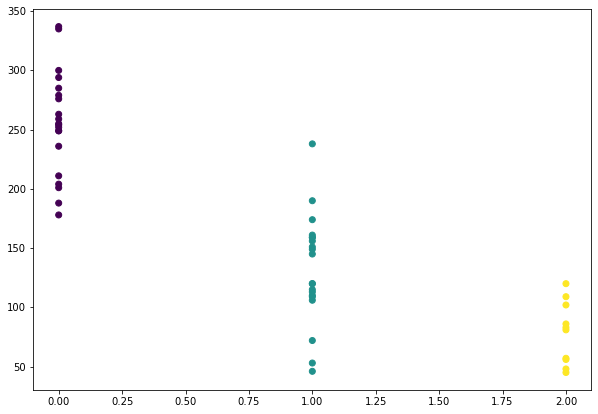

In [33]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['Cluster ID'], crime['Assault'],c=hc.labels_)